Read the outlier-removed df.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

train_data = pd.read_csv("UsedCarSellingInfoCraigslist_OutlierRemoved.csv")
train_data.head()

,Unnamed: 0,price,cylinders,odometer,weather,youSaveSpend,usage_yr,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,VClass_compact cars,VClass_large cars,VClass_midsize cars,VClass_midsize station wagons,VClass_midsize-large station wagons,VClass_minicompact cars,VClass_minivan - 2wd,VClass_minivan - 4wd,VClass_small pickup trucks,VClass_small pickup trucks 2wd,VClass_small pickup trucks 4wd,VClass_small sport utility vehicle 2wd,VClass_small sport utility vehicle 4wd,VClass_small station wagons,VClass_special purpose vehicle 2wd,VClass_special purpose vehicle 4wd,VClass_special purpose vehicles,VClass_sport utility vehicle - 2wd,VClass_sport utility vehicle - 4wd,VClass_standard pickup trucks,VClass_standard pickup trucks 2wd,VClass_standard pickup trucks 4wd,VClass_standard sport utility vehicle 2wd,VClass_standard sport utility vehicle 4wd,VClass_subcompact cars,VClass_two seaters,VClass_vans,"VClass_vans, passenger type",region_Midwest,region_Northeast,region_South,region_West,division_East North Central,division_East South Central,division_Middle Atlantic,division_Mountain,division_New England,division_Pacific,division_South Atlantic,division_West North Central,division_West South Central,manufacturer_acura,manufacturer_alfa romeo,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chev,manufacturer_chevrolet,manufacturer_chevy,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_hennessey,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
0,0,11900,6,43600,38,-5750,9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2800,6,168591,47,-2250,15,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2800,6,168591,47,-2250,15,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,400,0,217000,47,-1750,18,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,9900,8,169000,38,-5000,12,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's drop 'Unnamed: 0'.

In [2]:
train_data.drop(['Unnamed: 0'], axis = 1, inplace=True)
train_data.columns

Index(['price', 'cylinders', 'odometer', 'weather', 'youSaveSpend', 'usage_yr',
       'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       ...
       'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac',
       'manufacturer_porche', 'manufacturer_ram', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_toyota', 'manufacturer_volkswagen',
       'manufacturer_volvo'],
      dtype='object', length=108)

Let's makes features as X and target as y.

In [3]:
X = train_data.drop('price', axis=1)
y = train_data['price'].values

# Split train test data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree Regressor with RandomizedSearchCV

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
rt = DecisionTreeRegressor(random_state=42)
rt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# CART Decision Tree Regression Feature Importance

In [7]:
from matplotlib import pyplot as plt

Feature: 1, Score: 0.46751
Feature: 2, Score: 0.09520
Feature: 4, Score: 0.15504
Feature: 40, Score: 0.05271
Feature: 43, Score: 0.09778


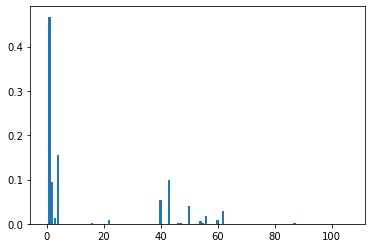

Wall time: 240 ms


<Figure size 432x288 with 0 Axes>

In [8]:
%%time
importance = rt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();
plt.savefig('decisiontreeregressor_feature_importance.png');

Let's reduce number of features within meaningful range, more than 0.05 only.

Let's makes NEW features as X1.

In [9]:
X_train.columns[[1,2,4,40,43]]

Index(['odometer', 'weather', 'usage_yr', 'VClass_sport utility vehicle - 4wd',
       'VClass_standard pickup trucks 4wd'],
      dtype='object')

In [10]:
X1 = train_data[['odometer', 'weather', 'usage_yr', 'VClass_sport utility vehicle - 4wd','VClass_standard pickup trucks 4wd']]

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [12]:
rt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
          'splitter' : ['best', 'random'],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2']}

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1, verbose=2, n_iter=2, cv=2)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    1.9s remaining:    1.9s


R-Squared::-0.00018250127492003276
Best Hyperparameters::
{'splitter': 'random', 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'friedman_mse'}


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.5s finished


In [14]:
%%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
          'splitter' : ['best', 'random'],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2'],
          'random_state' : [42]}

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1, verbose=2, n_iter=3, cv=3)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   13.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   16.0s finished


R-Squared::-0.07071136628229809
Best Hyperparameters::
{'splitter': 'best', 'random_state': 42, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'friedman_mse'}
Wall time: 20 s


In [15]:
%%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
          'splitter' : ['best', 'random'],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2'],
          'random_state' : [42]}

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1, verbose=2, n_iter=4, cv=4)
random_search_cv.fit(X_train, y_train)
print("R-Squared::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    2.2s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    4.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    7.2s finished


R-Squared::-0.0005760908563124945
Best Hyperparameters::
{'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'friedman_mse'}
Wall time: 8.02 s


In [16]:
from sklearn import tree
text_representation = tree.export_text(rt)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 70.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 3.50
|   |   |   |   |--- feature_1 <= 69.00
|   |   |   |   |   |--- feature_1 <= 52.50
|   |   |   |   |   |   |--- feature_1 <= 51.50
|   |   |   |   |   |   |   |--- feature_1 <= 42.00
|   |   |   |   |   |   |   |   |--- value: [59995.00]
|   |   |   |   |   |   |   |--- feature_1 >  42.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 50.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 49.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  49.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dept

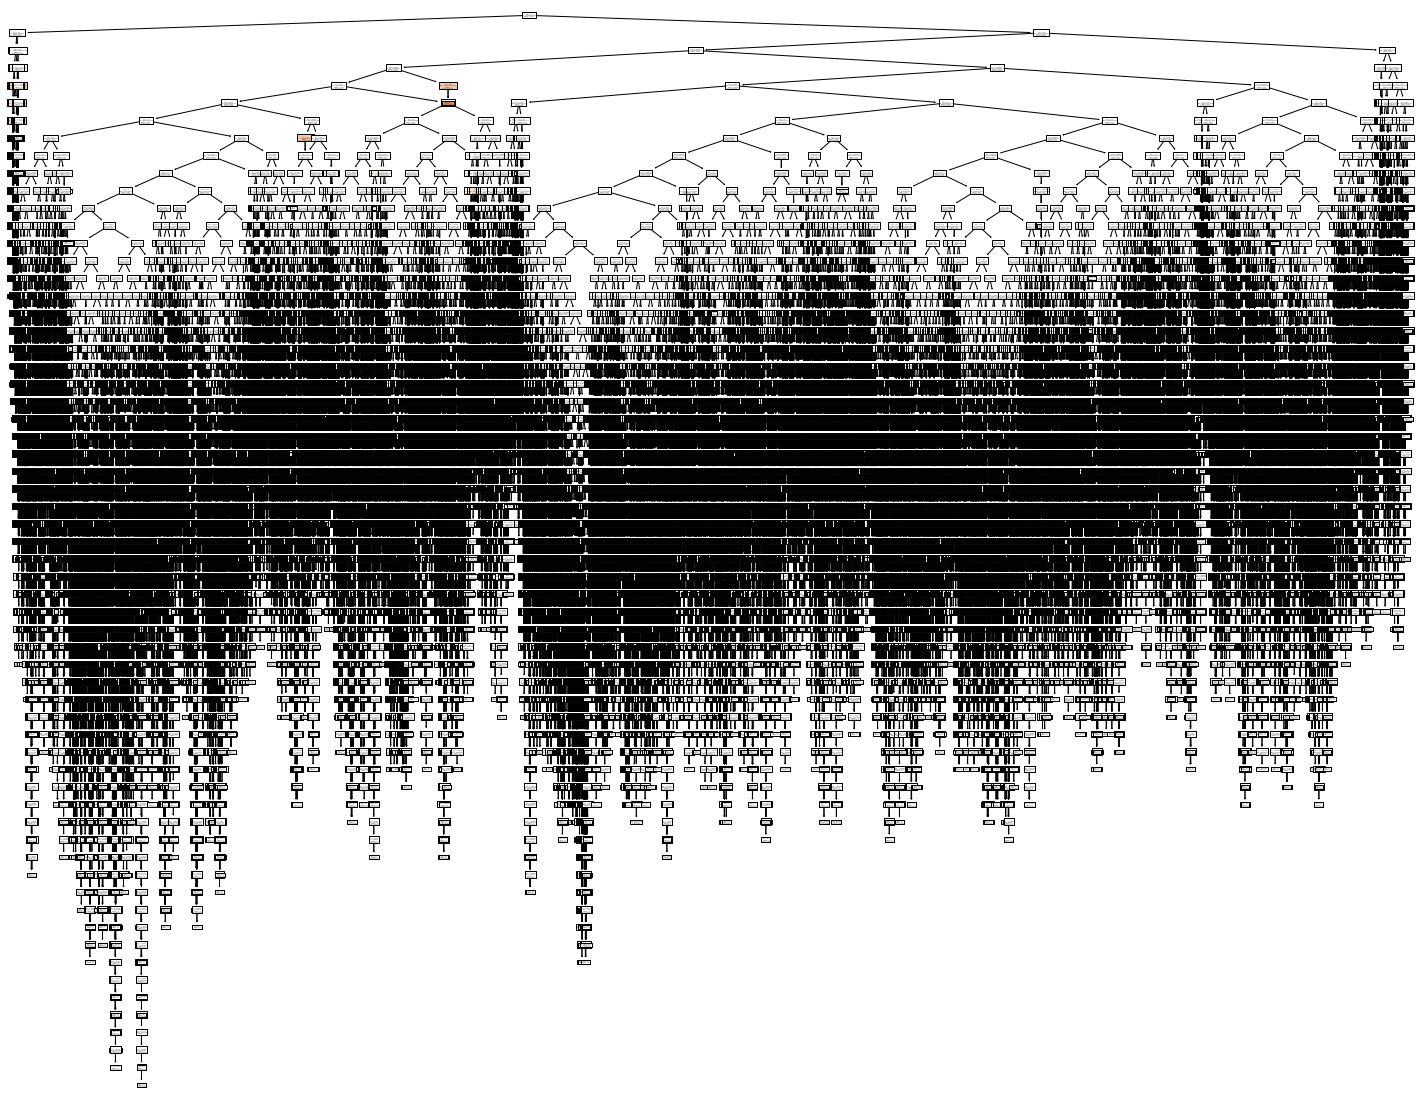

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rt, X_train, y_train,filled=True)

In [18]:
plt.savefig('decisiontree.png')

<Figure size 432x288 with 0 Axes>